#Chapter 1: Intro to PyTorch


##Deep learning

Extracts intricate patterns from large sets of unstructured data,<br>
(usually at least 100,000 data points)i.e. they can discover features <br>
from raw data. This is known as feature learning or representation learning.<br>

Raw data can be in the form of:
<ul>
  <li>Image pixels</li>
  <li>Text/characters</li>
  <li>Audio signals</li>
</ul>


Deep learning examples:
<ul>
  <li>Language translation</li>
  <li>Self-driving cars</li>
  <li>Medical diagnostics</li>
  <li>Chatbots</li>
</ul>

##PyTorch

Shares much with Numpy.<br>

PyTorch supports:
<ul>
  <li>image data: torchvision</li>
  <li>audio data: torchaudio</li>
  <li>text data: torchtext</li>
</ul>



###Tensor

Fundamental data structure in PyTorch. Can be created from python lists,<br>
or numpy arrays. Tensors also have various attributes:



In [ ]:
import torch

lst = [[1,2,3],[4,5,6]]
tensor= torch.tensor(lst)
print(tensor)
print(tensor.shape)
print(tensor.dtype)
print(tensor.device)

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])
torch.int64
cpu


Tensors support various operations:
<ul>
  <li>addition/subtraction</li>
  <li>element-wise multiplication</li>
  <li>matrix multiplication</li>
  <li>Transposition</li>
  <li>Concatenation</li>
</ul>

Most NumPy array operations can be performed on PyTorch Tensors.

##First neural network

NNs can have any number of hidden layers. For this example just using 2-layer<br>
(no hidden layers)


In [11]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

#test_df = pd.read_csv('sample_data/music_clean.csv')
#print(test_df.drop(['popularity', 'energy'],axis=1))

#Create input tensor with three features
input_tensor = torch.tensor([[0.3471, 0.4547, -0.2356]])

#Define first linear layer
linear_layer = nn.Linear(in_features=3, out_features=2)

#Pass input through linear layer
output = linear_layer(input_tensor)
print(output)

#Each linear layer has a set of associated weights and biases
linear_layer.weight
linear_layer.bias

tensor([[0.3983, 0.2590]], grad_fn=<AddmmBackward0>)


Parameter containing:
tensor([-0.0469,  0.3406], requires_grad=True)

Process
<ul>
  <li>Input tensor is passes to the linear layer</li>
   <li>Matrix mult. performed on input tensor ($X$) and weights ($W_0$)</li>
   <li>Bias ($b_0$) is added in</li>
</ul>

$y_0 = W_0 \cdot X + b_0$

with PyTorch, this is written as:
```python
output = W0 @ input + b0
```
where ```@``` denotes matrix multiplication

Note:
<ul>
  <li>Weights/biases initialized randomly</li>
   <li>Not useful until tuned</li>
</ul>

Networks only consisting of linear layers are called 'fully connected' networks.

##nn.Sequential

Allows multiple NN modules to be stacked in sequence.

In [18]:
input_tensor = torch.rand(1,10)

model = nn.Sequential(
    nn.Linear(10,18),
    nn.Linear(18,20),
    nn.Linear(20,5)
)

output_tensor = model(input_tensor)
print(output_tensor)

tensor([[-0.1918,  0.0442, -0.1650, -0.2251, -0.1409]],
       grad_fn=<AddmmBackward0>)


##Discovering Activation Functions

Activation functions
<ul>
  <li>Allow NNs to behave non-linearly</li>
  <li> i.e. output no longer a linear function of the input</li>
  <li>Learn more complex relationships between inputs and targets</li>
</ul>

Pre-activation output from one layer goes through activation function to become transformed output.<br>





##Sigmoid Activation Function

Widely used as last step for binary classification.<br>
Output bounded between $[0,1]$<br>
Sigmoid used as last layer in NN with a single linear layer <br>
is equivalent to logistic regression in traditional ML.

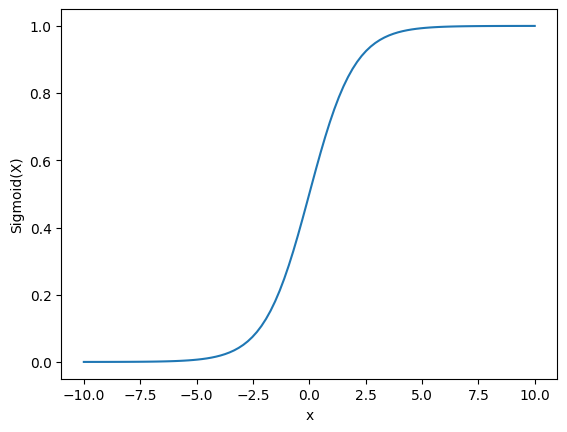

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")

plt.show()


In [21]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([[6.0]])
sigmoid = nn.Sigmoid()
output = sigmoid(input_tensor)
print(output)

model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4,1),
    nn.Sigmoid()
)

tensor([[0.9975]])


##SoftMax Activation Function
<ul>
  <li>Usually used for multi-class classification</li>
  <li>Can also be used as last layer in nn.Sequential</li>
  <li>Takes N-element vactor as input</li>
  <li>Outputs vector of same size as input</li>
  <li>Outputs a probability distribution</li>
  <li>Each element of output vector is a probability b/w $[0,1]$</li>
  <li>Sum of the output vector is 1</li>
</ul>

For $n$-dimensional output vector $\vec{V}$:
$\sum_{i=1}^{n} v_i = 1$


In [3]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([[4.3, 6.1, 2.3]])

#Below, dim=-1 indicates softmax is applied to input tensor's last dimension
probabilities = nn.Softmax(dim=-1)
output_tensor = probabilities(input_tensor)

print(output_tensor)

tensor([[0.1392, 0.8420, 0.0188]])


#Chapter 2: Training a NN with PyTorch

##Running a Forward Pass

Refers to generating a prediction from a model (can also be used for training).
<ul>
  <li>Input data passed forward (propagated) through a network</li>
  <li>Computations performed at each layer (intermediate representation of the data)</li>
  <li>Each layer's output passed as input to subsequent layer</li>
  <li>Outputs vector of same size as input</li>
  <li>Output of the final layer: "prediction"</li>
</ul>

Predictions based on a models learned parameters (weights, biases).<br>

Possible outputs
<ul>
  <li>Binary Classification</li>
  <ul>
    <li>Single probability between $[0,1]$</li>
  </ul>
  <li>Multiclass Classification</li>
  <ul>
    <li>Distibution of probabilities summing to 1</li>
  </ul>
  <li>Regression values</li>
  <ul>
    <li>Continuous numerical predictions</li>
  </ul>
</ul>

Note: backward pass (backpropagation) is used to update weights/biases during training.

Typical training loop may consist of:
<ul>
  <li>Propagate data forward</li>
  <li>Compare outputs to true values (ground-truth)</li>
  <li>Backpropagate: update model weights/biases</li>
  <li>Repeat until weights/biases tuned; model produces useful output(s)</li>
</ul>


##Loss Functions to Assess Model Predictions

Loss function:
<ul>
  <li>Gives feedback to model during training</li>
  <li>Takes in model prediction $\hat{y}$ and ground-truth $y$</li>
  <li>Outputs a float</li>
</ul>

Goal is to minimize the loss function:<br>

$loss = F(y,\hat{y})$
<ul>
  <li>$y$ is single integer (class label)</li>
  <ul>
    <li>e.g. $y=0$ could mean $y$ is a mammal</li>
  </ul>
  <li>$\hat{y}$ is a tensor (output of softmax)</li>
  <ul>
    <li>for $N$ classes, $\hat{y}$ is $N$-dimensional tensor</li>
  </ul>
</ul>

How to compare $y,\hat{y}$?

##One-Hot Encoding

Technique to represent categorical variables as numerical values.<Br>

Advantages:
<ul>
  <li>Allows use of numerical models for categorical data</li>
  <li>Can provide more info to the model, improving performance</li>
  <li>Can mitigate/avoid problem of ordinality (if var has natural ordering)</li>
</ul>

Disadvantages:
<ul>
  <li>Can increase model's: dimensionality, complexity, training time</li>
  <li>Can lead to sparse data (many observations will have 0s in most cols)</li>
  <li>Can lead to overfitting</li>
</ul>

In [24]:
import torch.nn.functional as F

print(F.one_hot(torch.tensor(0), num_classes=3))
print(F.one_hot(torch.tensor(1), num_classes=3))
print(F.one_hot(torch.tensor(2), num_classes=3))

tensor([1, 0, 0])
tensor([0, 1, 0])
tensor([0, 0, 1])


In [7]:
from torch.nn import CrossEntropyLoss

scores = torch.tensor([[-0.1211, 0.1059]])
one_hot_target = torch.tensor([[1, 0]])

criterion = CrossEntropyLoss()
criterion(scores.double(), one_hot_target.double())

tensor(0.8131, dtype=torch.float64)

##Loss function summary
Loss function takes:

<ul>
  <li>scores</li>
  <ul>
    <li>model predictions <b>before</b> the final softmax function</li>
  </ul>
  <li>one_hot_target</li>
  <ul>
    <li>one hot encoded ground truth label</li>
  </ul>
</ul>

Loss function outputs:
<ul>
  <li>loss</li>
  <ul>
    <li>a single <b>float</b></li>
  </ul>
</ul>

The goal is to <b>minimize</b> the loss function.

##Using Derivatives to Update Model Parameters

Using derivatives (sometimes called gradients) is a core step for minimizing loss.<br>

Can calculate the local gradient (gradient for each layer of a network) starting with the last layer.

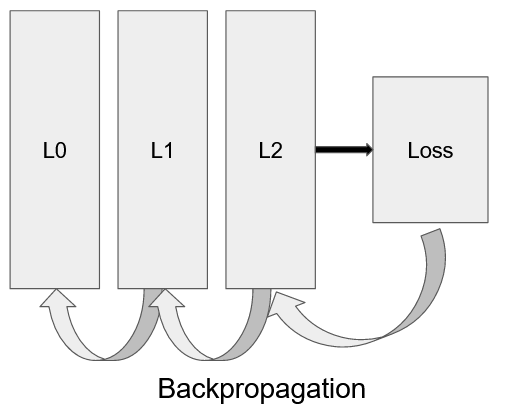

<br>
Calculate loss gradient w.r.t $L2$, then $L1$ w.r.t $L2$, etc.


In [56]:
from torch.nn import CrossEntropyLoss

sample = torch.rand(16)
target = torch.rand(2)

#Create model and run forward pass
model = nn.Sequential(nn.Linear(16, 8),
                      nn.Linear(8, 4),
                      nn.Linear(4, 2))
prediction = model(sample)

#scores = torch.tensor([[-0.1211, 0.1059]])
#one_hot_target = torch.tensor([[1, 0]])

#Calculate loss and compute gradients
criterion = CrossEntropyLoss()
loss = criterion(prediction, target)
loss.backward()

#Access each layer's gradients
model[0].weight.grad, model[0].bias.grad
model[1].weight.grad, model[1].bias.grad
model[2].weight.grad, model[2].bias.grad

(tensor([[ 0.0170,  0.0323, -0.0181,  0.0170],
         [-0.0170, -0.0323,  0.0181, -0.0170]]),
 tensor([ 0.0898, -0.0898]))

###Update model parameters manually

In [57]:
#Learning rate typically small
lr = 0.001

#Update weights
weight = model[0].weight
weight_grad = model[0].weight.grad
weight = weight - lr * weight_grad

#Update biases
bias = model[0].bias
bias_grad = model[0].bias.grad
bias = bias - lr * bias_grad

##Convex and Con-Convex Functions

Convex functions have only one single (global) minimum.<br>
Non-convew functions have multiple minima.<br>



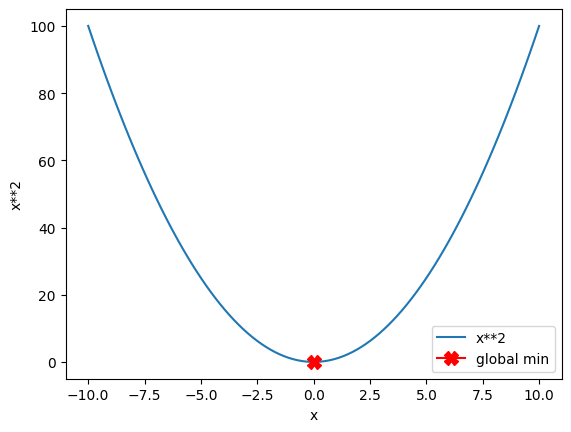

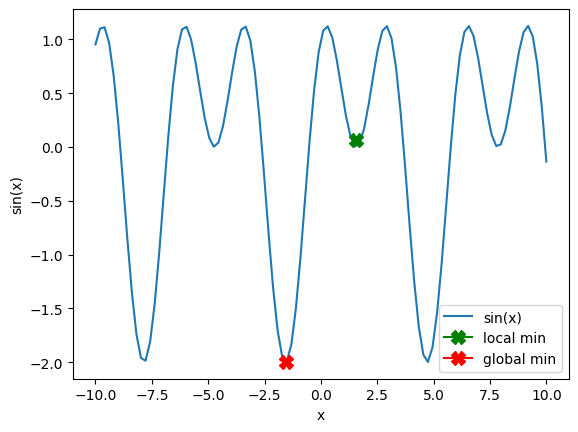

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.linspace(-10, 10, 100)
y=np.sin(x) + np.cos(2*x)
z = x ** 2

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("x**2")
plt.plot(0, min(z), marker='X', markersize=10, color="red")
plt.legend(['x**2', 'global min'], loc='lower right')
plt.show()

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.plot(1.55, 0.06, marker='X', markersize=10, color="green")
plt.plot(-1.55, min(y), marker='X', markersize=10, color="red")
plt.legend(['sin(x)', 'local min', 'global min'], loc='lower right')
plt.show()


##Gradient Descent

<ul>
  <li>Used to find global minima of non-convex functions</li>
  <li>In PyTorch <b>optimizer</b> takes care of weight updates</li>
  <li>Most common <b>optimizer</b> is stochastic gradient descent (SGD)</li>
</ul>

PyTorch optimizer
<ul>
  <li>calculates local gradients (double check)</li>
  <li>Updates model params (weights) accordingly</li>
</ul>

In [59]:
import torch.optim as optim

#Create optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

#Update optimizer
optimizer.step()

##Writing a Training Loop

<ol>
  <li>Create a model</li>
  <li>Choose a loss function</li>
  <li>Create a dataset</li>
  <li>Define an optimizer</li>
  <li>Training loop: repeat following for each dataset</li>
  <ul>
    <li>Calculate loss (forward pass)</li>
    <li>Calculate loca gradients</li>
    <li>Update model parameters</li>
  </ul>
</ol>

Using provided data science salary dataset:
<ul>
  <li>features categorizes</li>
  <li>data normalized</li>
  <li>target is continuous (regression)</li>
</ul>

Can't use sigmoid or softmax, as they only apply to classification.<br>
Last layer will be a linear layer. Must use a different loss function.

##Mean Squared Error (MSE) Loss Function

Uses the squared difference b/w prediction and ground truth.<br>

```python
def mean_squared_loss(prediction, target):
  return np.mean((prediction - target)**2)
```

This is also used in Scikit-Learn when using .fit() on a linear regression model.<br>

In PyTorch MSELoss is used in regression problems as a criterion similar to CrossEntropyLoss:
```python
criterion = nn.MSELoss()
#Prediction and target must be float tensors
loss = criterion(prediction, target)
```


In [ ]:
#Create the dataset and the dataloader
dataset = TensorDataset(torch.tensor(features).float(),
                        torch.tensor(target).float())

'''Create batches of data which are passed through the model
in each forward or backward pass'''
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

#Create the model
model = nn.Sequential(nn.Linear(4, 2),
                      nn.Linear(2, 1))

#Don't need on hot encoding b/c this is a regression problem
#Create the loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

#One loop through entire dataset is called an epoch
#Will loop through dataset multiple times
for epoch in range(num_epochs):
  for data in dataloader:
    #Optimizer stores gradients from previous datasets by default
    #So must set gradients to zero
    optimizer.zero_grad()
    #Get feature and target from data loader
    feature, target = data
    #Run a forward pass
    pred = model(feature)
    #Compute loss and gradients
    loss = criterion(pred, target)
    loss.backward()
    #Update the parameters
    optimizer.step()

#Chapter 3: NN Architecture and Hyperparameters

##Discovering activation functions

Sigmoid/softmax usu. used on last linear layer of a model.<br>

Sigmoid is bounded b/wt [0,1]. Its gradient always approaches 0 for low/high values of x.<br>
The function is said to <b>saturate</b>. This can lead to  <b>vanishing gradients</b> during backpropagation.<br>
For high/low values of x the gradient is so small the weights might not update.<br>
This also occurs for the softmax function, since each element of the output is also bounded b/w [0,1].


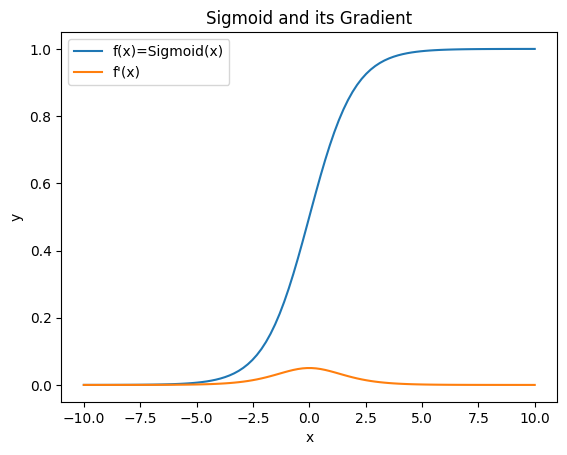

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
y = np.gradient(z)

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.title('Sigmoid and its Gradient')
plt.legend(["f(x)=Sigmoid(x)", "f'(x)"], loc='upper left')
plt.show()

##Rectified Linear Unit (ReLU) Activation Function

Outputs maxmium b/w input and zero. No upper bound, grads don't converge to zero for high values.<br>
Thus it overcomes the saturation problem.

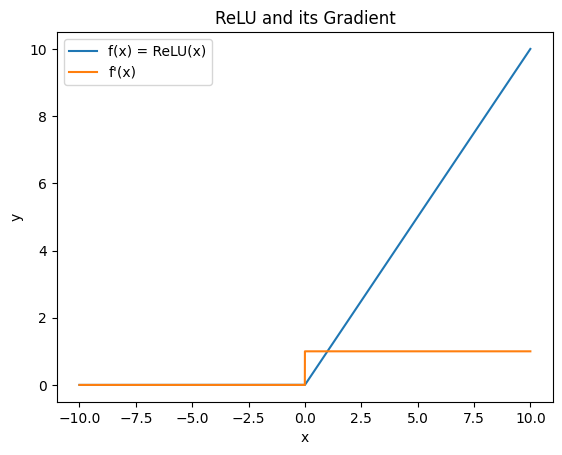

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math

def ReLU(x):
  if x <= 0:
    return 0
  else:
    return x

def gradReLU(x):
  if x < 0:
    return 0
  else:
    return 1

#x = np.arange(-10, 10)
x = np.linspace(-10, 10, 10000)
z = [ReLU(y) for y in x]
#y = [gradReLU(y) for y in x]
y = np.gradient(z, x)

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("y")
plt.step(x, y)
plt.title('ReLU and its Gradient')
plt.legend(["f(x) = ReLU(x)", "f'(x)"], loc='upper left')
plt.show()

##Leaky ReLU Activation Function

Similar behavior for positive inputs.<br>
For negative inputs, multiples input by a small coefficient<br>
In PyTorch this is the 'negative_slope' param (default = 0.01).<br>

ReLU and Leaky ReLU can be called after each linear layer.<br>



##More NN Architecture

When building a NN, the number of nodes in the input layer (features), and output layer (classes)<br>
are determined by the dataset being used, e.g.:<br>

```python
model = nn.Sequential(nn.Linear(n_features, 8),
                      nn.Linear(8, 4),
                      nn.Linear(4, n_classes))
```

Increasing the number of parameters (by increasing number/dimension of hidden layers) increases the <b>model capacity</b>.

Can usu. assess capacity of model using total number of learnable parameters<br>:

each neuron in a layer has $n+1$ learnable params, where: <br>
$n$ = number of neurons in the previous layer, plus the bias.<br>

```python
model = nn.Sequential(nn.Linear(8, 4),
                      nn.Linear(4, 2))
```

In above example, first hidden layer has 4 neurons, each with 9 params = 36 params<br>
the second hidden layer has 2 neurons, each with 5 params = 10 params<br>
In total, the model has 46 learnable parameters.<br>

PyTorch uses ```.numel()``` to return the number of elements in the tensor.<br>

Higher capacity of model (more params) allows it to assess more complex data,<br>
but it takes longer to train. Need to find the balance.


In [33]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([[6.0]])
sigmoid = nn.Sigmoid()
output = sigmoid(input_tensor)
print(output)

model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4,1),
    nn.Sigmoid()
)

total = 0
for parameter in model.parameters():
  total += parameter.numel()
print(total)

tensor([[0.9975]])
33


##Learning Rate and Momentum

Updating weights with SGD (Stochastic Gradient Descent) optimizer:<br>

Two parameters:
<ul>
  <li><b>Learning rate</b>: controls step size</li>
  <ul>
    <li>too small: optimizer may never find minima</li>
    <li>too large: may overshoot minima</li>
  </ul>
  <li><b>Momentum</b>: controls the inertia of the optimizer</li>
  <ul>
    <li>too small: optimizer may get stuck in local minima</li>
  </ul>
</ul>

Optimize these parameters to minimize training time and improve performance.<br>

##Layer Initialization

Layer weights initialized to small values.<br>

Recall - a neurons output in a linear layer is a weight sum of its inputs (previous layer's neurons' outputs).<br>

Layer weights can be initialized in different ways, including sampling from distributions.<br>



In [36]:
import torch.nn as nn

layer = nn.Linear(64, 128)

#Initialize layer's weights from a uniform distribution
nn.init.uniform_(layer.weight)

#print(custom_layer.fc.weight.min(), custom_layer.fc.weight.max())

Parameter containing:
tensor([[0.1593, 0.1072, 0.7143,  ..., 0.0747, 0.9596, 0.2037],
        [0.4751, 0.4868, 0.0404,  ..., 0.3588, 0.8642, 0.3739],
        [0.7071, 0.6129, 0.8291,  ..., 0.4287, 0.3481, 0.5691],
        ...,
        [0.7344, 0.4938, 0.7002,  ..., 0.8618, 0.7039, 0.1912],
        [0.5235, 0.3448, 0.3682,  ..., 0.7581, 0.4015, 0.0032],
        [0.2040, 0.9498, 0.0059,  ..., 0.9676, 0.2971, 0.1352]],
       requires_grad=True)

##Transfer Learning

Transfer Learning: reusing a model trained on a first task for a second similar task.

ML engineers don't usually initialize layer weights from scratch.<br>

##Fine-Tuning

A specific type of transfer learning. Load weights from previously trained model, but <br>
train the model with a smaller learning rate.<br>
Can train specific layers, while "freezing" others.<br>
Rule of thumb: freeze early layerws, fine-tune layers closer to the output.<br>



In [ ]:
import torch.nn as nn

layer = nn.Sequential(nn.Linear(64, 128),
                      nn.Linear(128, 256))

for name, param in model.named_parameters():
  if name == '0.weight':
    param.requires_grad = False

#Chapter 4: Evaluating and Improving Models

#Loading Data: Deeper Dive



In [ ]:
import pandas as pd
import numpy as np

#csv not provided in course. This cell will error.
animals = pd.read_csv('animals.csv')

features = animals.iloc[:,1,-1]
X = features.to_numpy()

target = animals.iloc[:,-1]
y = target.to_numpy()



###TensorDataset and DataLoader

TensorDataset is a PyTorch class for creating a PyTorch dataset for tensors.<br>
Can pass this dataset to the DataLoader class.


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

#Instantiate dataset class
dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float())

#Access an individual sample
sample = dataset[0]

#Unpack the resulting tuple
input_sample, label_sample = sample

#batch_size -> how many samples to take from dataset per iteration
batch_size = 2

#Whether or not to shuffle the data on each iteration
shuffle = True

#Create the DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

#Iterate over the dataloader
for batch_inputs, batch_labels in dataloader:
  pass

##Evaluating Model Performance

Raw data usually split into three subsets:

\begin{array}{|c|c|} \hline
  \text{Subset} & \text{percent of data} & \text{Role} \\ \hline
  \text{Training} & 80-90 & \text{adjust model params} \\ \hline
  \text{Validation} & 10-20 & \text{hyperparam tuning} \\ \hline
  \text{Testing} & 5-10 & \text{used once to calc final metrics} \\ \hline
\end{array}

##Calcualting Loss

Training loss calculated by summing up loss for each iteration of training set dataloader.<br>
Calculate the mean training loss after each epoch

```python
training_loss = 0.0

for i, data in enumerate(trainloader, 0):
  #Run forward pass
  ...

  #calcualte loss
  loss = criterion(outputs, labels)

  #calculate gradients
  ...

  #Calculate and sum the loss
  training_loss += loss.item()

#Calculate mean loss
epoch_loss = training_loss / len(trainloader)
```




##Calculate Validation Loss

Validation loss calculated by summing up loss for each iteration of validation set dataloader.<br>
Calculate the mean training loss after each epoch

```python
training_loss = 0.0

'''Put model in evaluation mode (some layers behave differently in training
  vs. validation mode'''

model.eval()

#Don't calc gradients (speeds up forward pass)
with torch.no_grad()
  for i, data in enumerate(validationloader, 0):
    #Run forward pass
    ...

    #calcualte loss
    loss = criterion(outputs, labels)
    validation_loss += loss.item()

#Calculate mean loss
epoch_loss = validation_loss / len(validationloader)

#Set model back to training mode
model.train()
```

##Overfitting

Important to track validation and training loss to understand when model starts overfitting.<br>
This occurs when the model stops generalizing and performance on validation set degrades.<br>
i.e. vlidation loss is high, training loss is not.




##torchmetrics

In [ ]:
import torchmetrics

#Create accuracy metric
metric = torchmetrics.Accuracy(task='multiclass', num_classes=3)

for i,data in enumerate(dataloader, 0):
  features, labels = data
  outputs = model(features)

  #Calculate accuracy over the batch
  acc = metric(output, labels.argmax(dim=-1))

#Calculate accuracy over entire epoch
acc = metric.compute()

#Reset metric for next epoch (accuracy calculated same way for train/validation)
metric.reset()

##Fighting Overfitting

\begin{array}{|c|c|} \hline
  \text{Problem} & \text{Solution} \\ \hline
  \text{Dataset too small} & \text{Get more data/ use augmentation} \\ \hline
  \text{Model has too much capacity} & \text{Reduce model size/add dropout} \\ \hline
  \text{Weights too large} & \text{Weight decay} \\ \hline
\end{array}



### Dropout Layer

A form of regularization:<br>

A random fraction of input neurons is set to zero at each update.<br>
Corresponding connections are temporarily removed.<br>
Decreases model's tendency to over-rely on specific features.<br>

<ul>
  <li>Randomly zeroes out elements of thei nput tensor <b>during training</b></li>
  <li>Dropout usually added <b>after</b> the activation function</li>
  <li>Behaves differently during training/eval. <b>Must switch modes</b></li>
</ul>

```python
model = nn.Sequential(nn.Linear(8, 4),
                      nn.ReLU(),
                      #p is probability of setting a neuron's output to zero
                      nn.Dropout(p=0.5))
features = torch.randn((1, 8))
model(i)
```



### Weight Decay

Another form of regularization:<br>
<ul>
  <li>Add penalty to loss function - discourages large weights/biases</li>
  <li>Value b/w 0-1, usually very small</li>
  <li>Higher value = model less likely ot overfit</li>
  <li>Proportional to current value of the weight</li>
  <li>Subtracted from gradient during backpropagation</li>
</ul>

```python
optimizer = optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-4)
```

### Data Augmentation

Artifically increase the size of the dataset.<br>
Commonly applied to image data. Not covered in current course.

##Improving Model Performance

Steps to maximize performance
<ul>
  <li>Overfit the training set</li>
  <ul>
    <li>Is the problem solvable?</li>
    <li>Set a performance baseline</li>
  </ul>
  <li>Reduce overfitting</li>
  <ul>
    <li>improve performance on validation set</li>
  </ul>
  <li>Finetune hyperparameters</li>
</ul>

### Step 1: Overfit the Training Set

<ul>
  <li>Modify training loop to overfit a single data point (batch_size=1)</li>
  <ul>
    <li>should reach 1.0 accuracy, 0 loss</li>
    <li>helps find bugs in the code</li>
  </ul>
  <li>Goal: minimize training loss</li>
  <ul>
    <li>create large enough model</li>
    <li>hyperparameters should be kept to defaults</li>
  </ul>
</ul>

```python
features, labels = next(iter(trainloader))
for i in range(1e3):
  outputs = model(features)
  loss = criterion(outputs, labels)
  loss.backward()
  optimizer.step()
```


### Step 2: Reduce Overfitting

<ul>
  <li>Goal: maximize validation accuracy</li>
  <li>Experiment with: </li>
  <ul>
    <li>Dropout</li>
    <li>Data augmentation</li>
    <li>Weight decay</li>
    <li>Model capcity reduction</li>
  </ul>
  <li>Keep track of each hyperparameter</li>
  <li>Report maximum validation accuracy</li>
</ul>

### Step 3: Fine-tune Hyperparameters

Grid Search
<ul>
  <li>Use values of params at a constant interval</li>
  <li>Usu. done on optimizer params (learning rate, momentum)</li>
</ul>

```python
for factor in range(2,6):
  lr = 10 ** -factor
```

Random Search
<ul>
  <li>Use random values of params within a given range</li>
  <li>Usu. yields better results than Grid Search</li>
</ul>

```python
factor = np.random.uniform(2,6):
lr = 10 ** -factor
```

#Summary

<ul>
  <li>Chapter 1</li>
  <ul>
    <li>Intro to Deep Learning</li>
    <li>Created small NNs</li>
    <li>Linear layers</li>
    <li>Activation functions</li>
  </ul>
  <li>Chapter 2</li>
  <ul>
    <li>Created/ used loss functions</li>
    <li>Calculated derivatives (gradients)</li>
    <li>Used backpropagations</li>
    <li>Trained a NN</li>
  </ul>
  <li>Chapter 3</li>
  <ul>
    <li>Manipulated NN architecture</li>
    <li>Used learning rate/momentum</li>
    <li>Transfer learning</li>
  </ul>
  <li>Chapter 4</li>
  <ul>
    <li>Dataloaders</li>
    <li>Reduce overfitting</li>
    <li>Evaluate model performance</li>
  </ul>
</ul>

Recommend book: 'Deep Learning', Goodfellow, Bengio, and Courville